# AI-Powered Insurance Premium Estimator

## Import Libraries

In [ ]:
from kagglehub import dataset_download

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, r2_score

## 1. CSV Analyser

### 1.1 Categorical to numerical Encoding

In [ ]:
def catEncoding(df):
    for col in df.select_dtypes(include='object').columns:
        print(f"Column '{col}': {df[col].nunique()} unique values")
        if df[col].nunique() > 2:
            df = pd.get_dummies(df, columns=[col], dtype=int )
        else:
            df[col] = df[col].astype('category').cat.codes
    return df

### 1.2 Data Description

In [ ]:
def dataInfo(df):
    print(df.info())
    print("="*150)
    print(df.describe())

### 1.3 Data Visualization

In [ ]:
def plotPair(df):
  sns.pairplot(df)
  plt.suptitle('Pairwise Relationships of Features', y=1)
  plt.show()

In [ ]:
def dfVisual(df):
  plt.figure(figsize=(10,8))
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)

### 1.4 Main CSV Analyser

In [ ]:
def csvAnalyser(path):
    df = pd.read_csv(path) # Read in pandas dataframe

    print(df.head())
    print("="*150)

    df = catEncoding(df)
    print("="*150)

    print(df.head())
    print("="*150)

    dataInfo(df)
    print("="*150)

    dfVisual(df)
    plotPair(df)
    return df

## 2. Dataset and CSV Analyzer Utilization

In [ ]:
dataset_download("willianoliveiragibin/healthcare-insurance")

'/kaggle/input/healthcare-insurance'

In [ ]:
path = '/kaggle/input/healthcare-insurance/insurance.csv'

In [ ]:
df1 = pd.read_csv(path)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520
Column 'sex': 2 unique values
Column 'smoker': 2 unique values
Column 'region': 4 unique values
   age  sex     bmi  children  smoker      charges  region_northeast  \
0   19    0  27.900         0       1  16884.92400                 0   
1   18    1  33.770         1       0   1725.55230                 0   
2   28    1  33.000         3       0   4449.46200                 0   
3   33    1  22.705         0       0  21984.47061                 0   
4   32    1  28.880         0       0   3866.85520                 0   

   region_northwest  region_southeast  region_southwest  
0                 0          

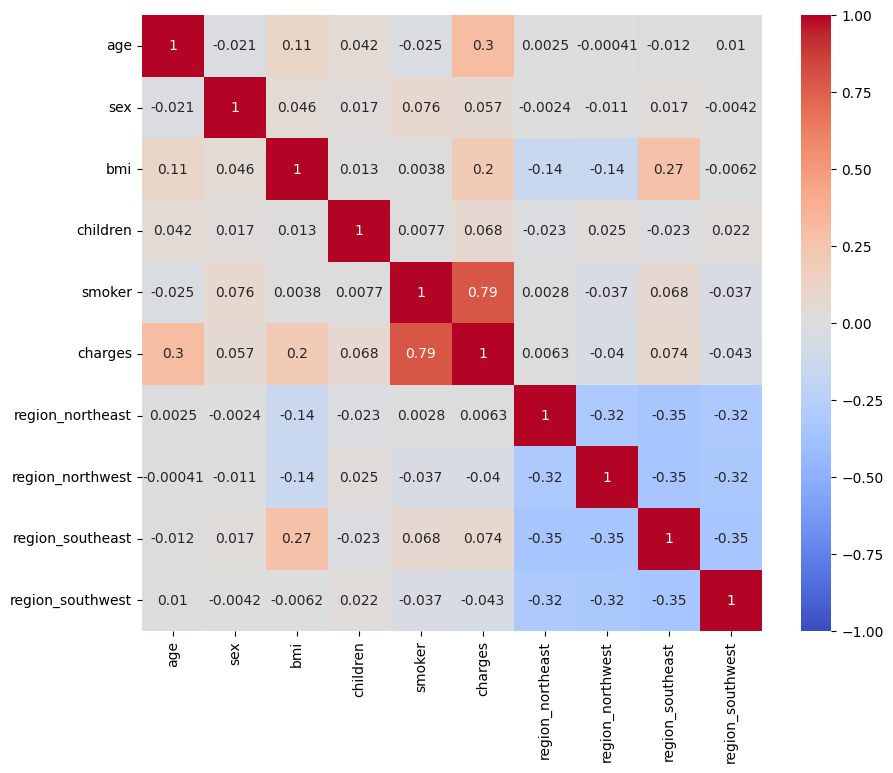

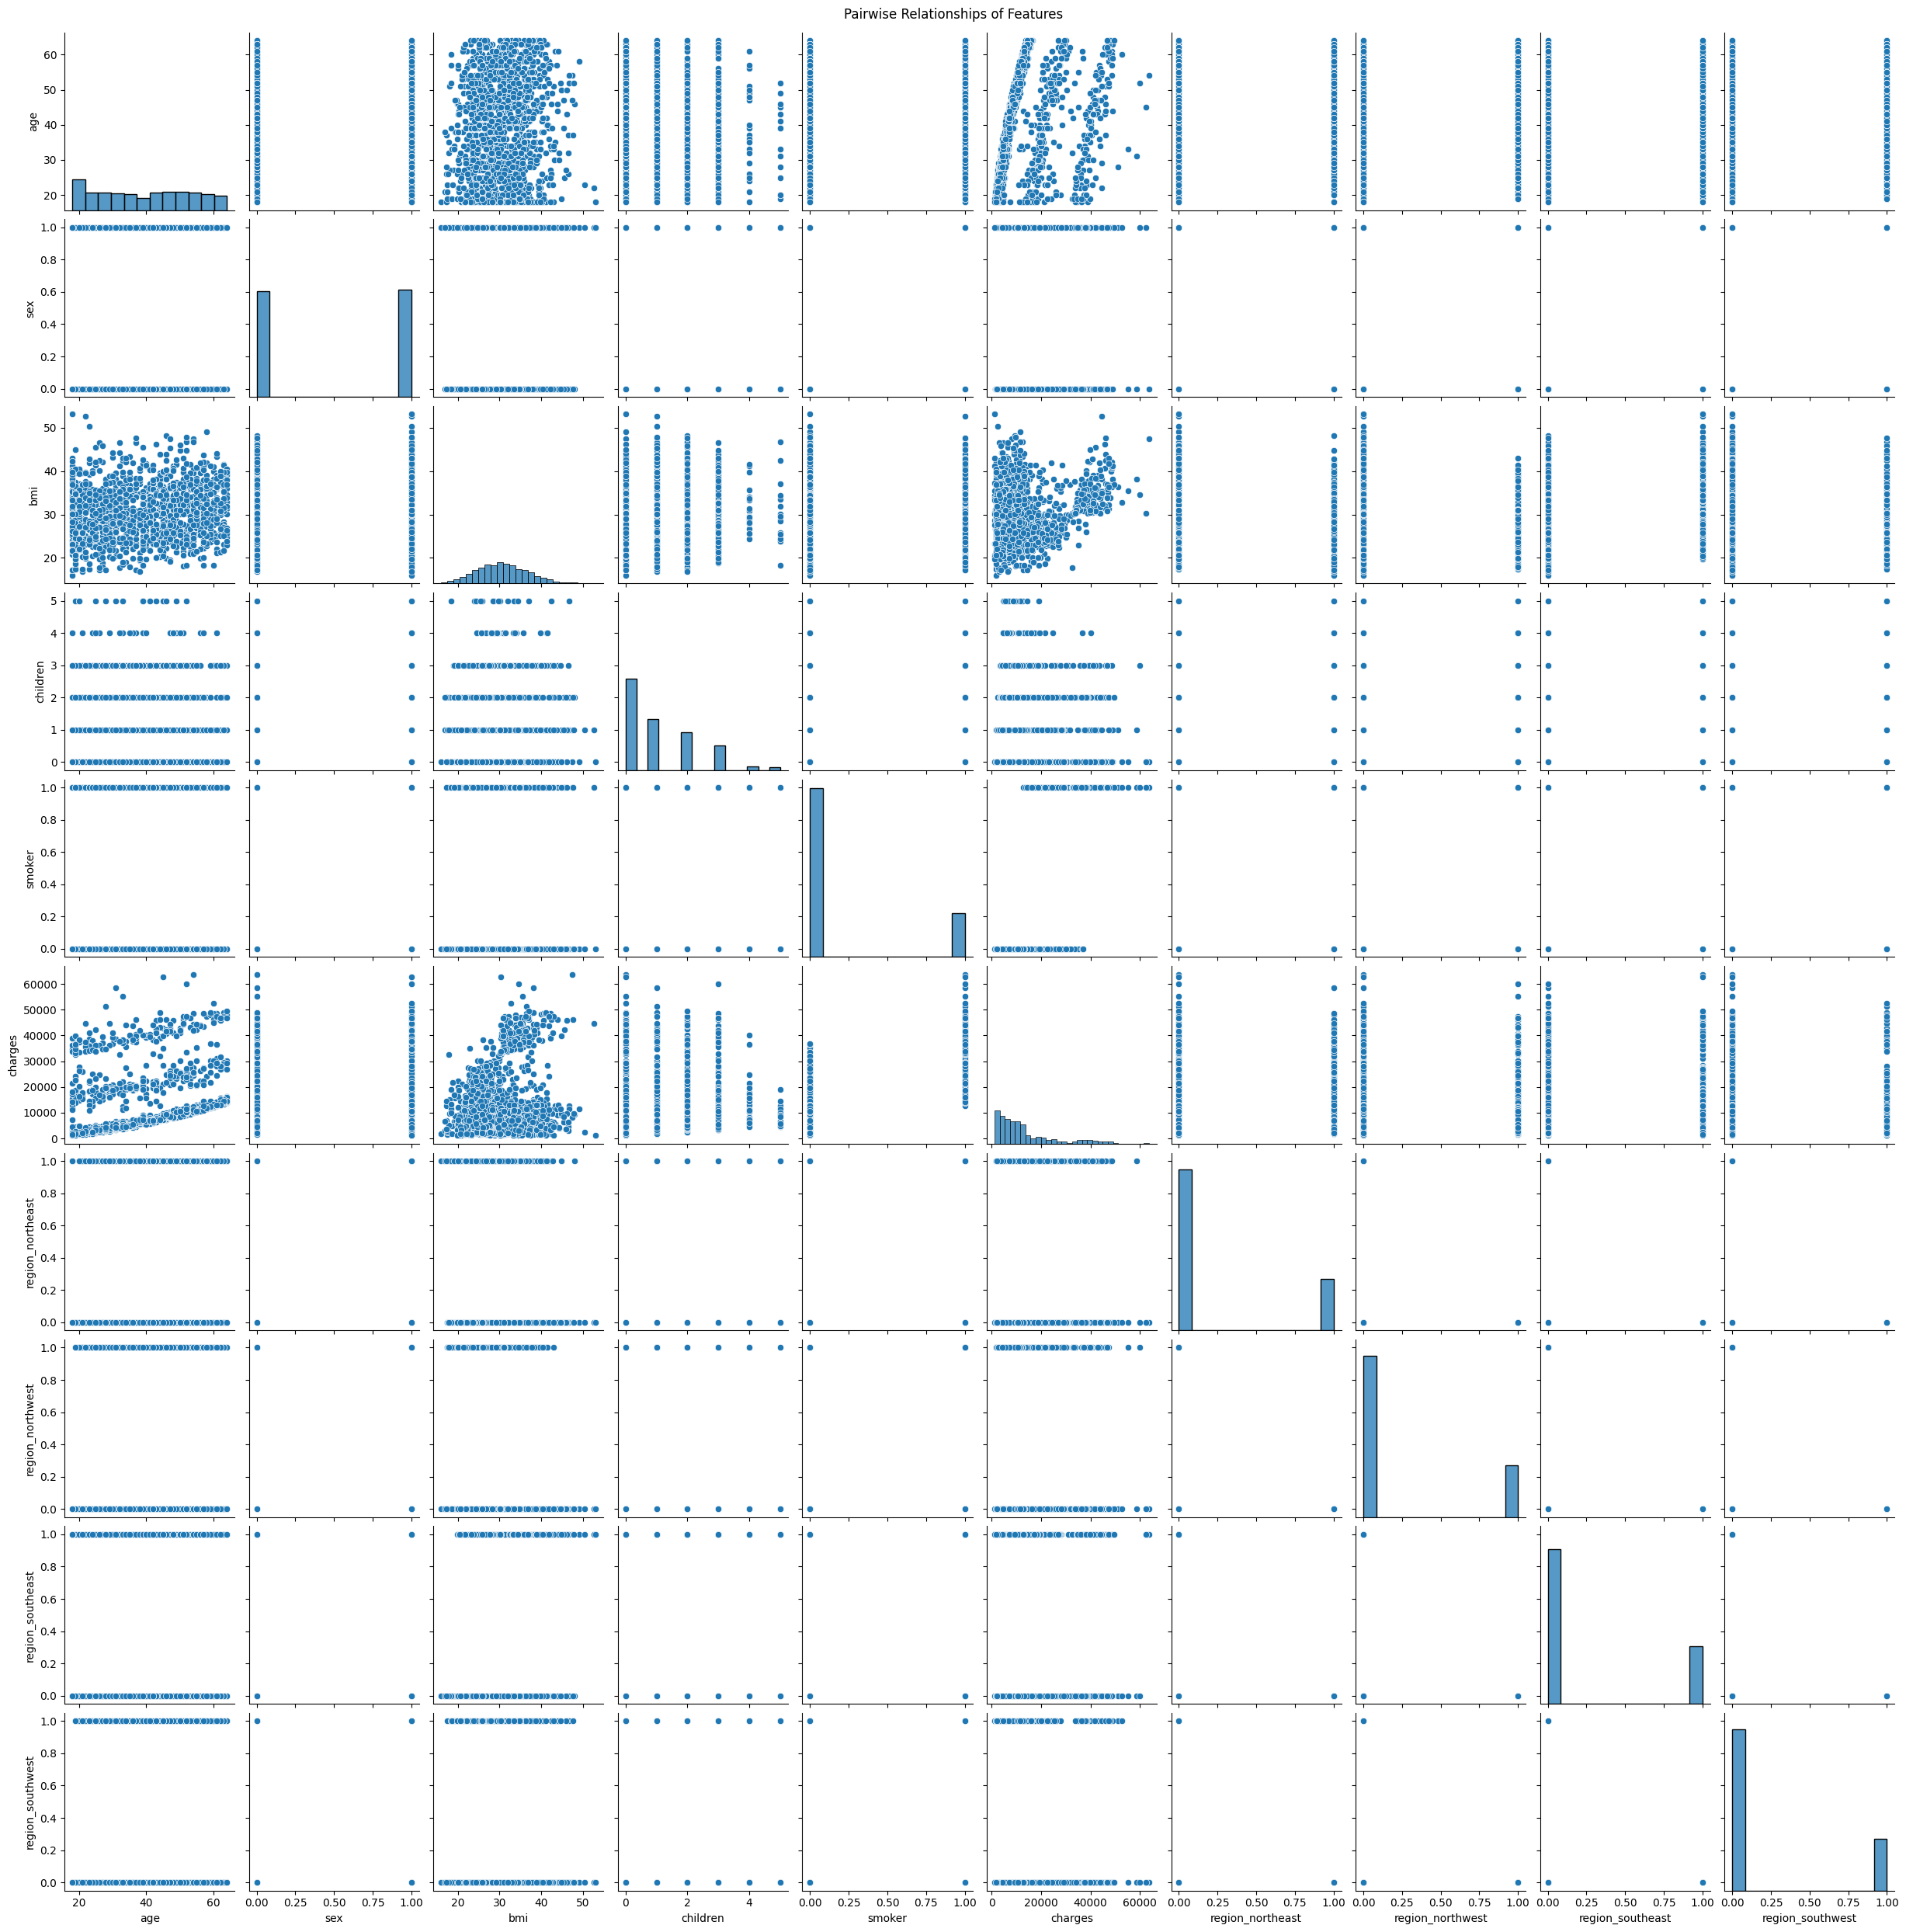

In [ ]:
df = csvAnalyser(path)

## 3. Model

### 3.1 Model Training
Random Forest Regressor

In [ ]:
x = df.drop('charges', axis=1)
y = df['charges']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2) # 20%

In [ ]:
model = RandomForestRegressor()

In [ ]:
model = LinearRegression()

In [ ]:
model = DecisionTreeRegressor()

In [ ]:
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

### 3.2 Model Accuracy

In [ ]:
y_pred = model.predict(x_test)
r2_score(y_test, y_pred)

0.8288583931841739

In [ ]:
model.score(x_test, y_test)

0.8288583931841739

Text(0, 0.5, 'Predictions')

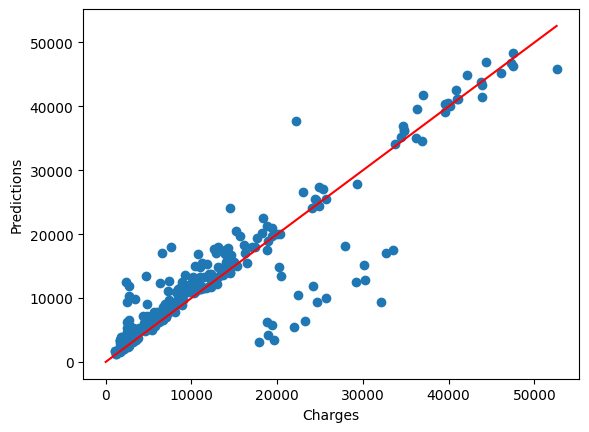

In [ ]:
y_pred = model.predict(x_test)
plt.scatter(y_test, y_pred)
plt.plot(np.linspace(0, max(y_test)), np.linspace(0, max(y_test)), color='red')
plt.xlabel('Charges')
plt.ylabel('Predictions')

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 20, None],
    'min_samples_split': [2, 5, 10]
}

model = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(x_train, y_train)

print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}


In [ ]:
best_params = {'max_depth': 5, 'min_samples_split': 10, 'n_estimators': 50}

optimized_model = RandomForestRegressor(
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    n_estimators=best_params['n_estimators'],
    random_state=42
)

optimized_model.fit(x_train, y_train)

y_pred = optimized_model.predict(x_test)

In [ ]:
optimized_model.score(x_test, y_test)

0.8419761885765202

# 4. Dashboard

In [ ]:
feature_importances = zip(model.feature_names_in_, model.feature_importances_)

In [ ]:
feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)

<BarContainer object of 9 artists>

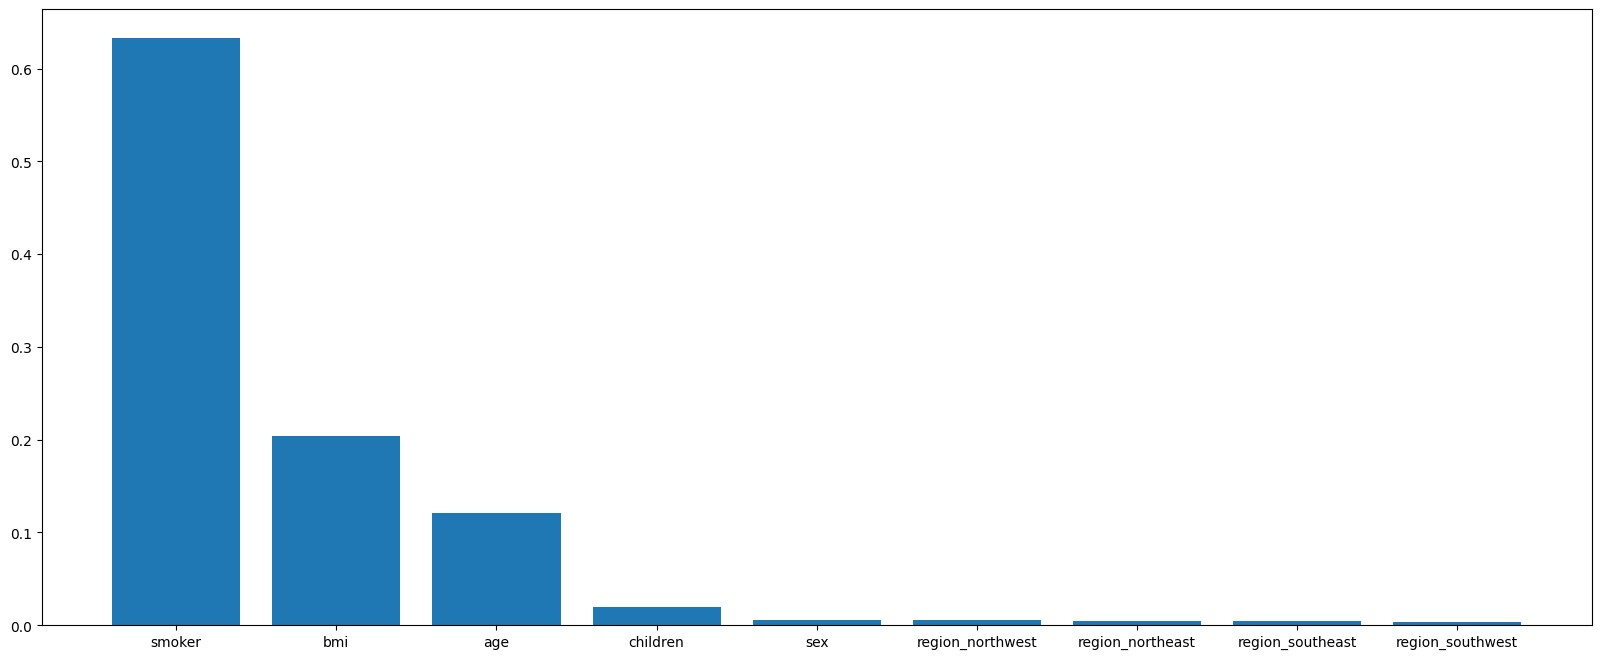

In [ ]:
plt.figure(figsize=(20,8))
plt.bar([x[0] for x in feature_importances], [x[1] for x in feature_importances])

In [ ]:
input_data = {}
print("Please enter the following information:")

input_data['age'] = int(input("Enter age (integer): "))
input_data['sex'] = input("Enter sex (male or female): ").lower()
input_data['bmi'] = float(input("Enter BMI (float): "))
input_data['children'] = int(input("Enter number of children (integer): "))
input_data['smoker'] = input("Are you a smoker? (yes or no): ").lower()
input_data['region'] = input("Enter region (northeast, southeast, southwest, northwest): ").lower()

# Convert input to a pandas DataFrame
input_df = pd.DataFrame([input_data])

Please enter the following information:
Enter age (integer): 20
Enter sex (male or female): male
Enter BMI (float): 30
Enter number of children (integer): 2
Are you a smoker? (yes or no): yes
Enter region (northeast, southeast, southwest, northwest): northeast


In [ ]:
input_df['sex'] = input_df['sex'].astype('category').cat.codes
input_df['smoker'] = input_df['smoker'].astype('category').cat.codes
input_df = pd.get_dummies(input_df, columns=['region'], dtype=int)

In [ ]:
for col in x_train.columns:
    if col not in input_df.columns:
        input_df[col] = 0

In [ ]:
input_df = input_df[x_train.columns]

predicted_charges = optimized_model.predict(input_df)

print(f"\nPredicted charges: ${predicted_charges[0]:,.2f}")


Predicted charges: $7,090.80
